# This is for generating report from 'Segmented Image'

**Importing Packages**

In [1]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as plt
import array as arr
from tabulate import tabulate

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Reading Images**

In [ ]:
img_loc='/content/drive/MyDrive/Colab Notebooks/datasets/satellite/DubiaDataset/Tile 4/images/image_part_005.jpg'
img=cv2.imread(img_loc)
masks_loc='/content/drive/MyDrive/Colab Notebooks/datasets/satellite/DubiaDataset/Tile 4/masks/image_part_005.png'
masked_img=cv2.imread(masks_loc)
cv2_imshow(masked_img)
cv2_imshow(img)

*Defining the masking colors according to the classes with* **(BGR color format)**

In [ ]:
building_mask_color=(152,16,60)
tree_mask_color=(58,221,254)
water_mask_color=(41,169,226)
land_mask_color=(246,41,132)
road_mask_color=(228,193,110)
bridge_mask_color=road_mask_color
green=(0,255,0)
red=(0,0,255)
blue=(255,0,0)

***Binary Mask image genarating function from a specified mask class***

In [ ]:
def create_binary_mask(masked_image, target_color):
    lower_color = np.array(target_color, dtype=np.uint8)
    upper_color = np.array(target_color, dtype=np.uint8)
    x=cv2.inRange(masked_image, lower_color, upper_color)
    cv2_imshow(x)
    return x

**Generating the binary masking images for all classes**



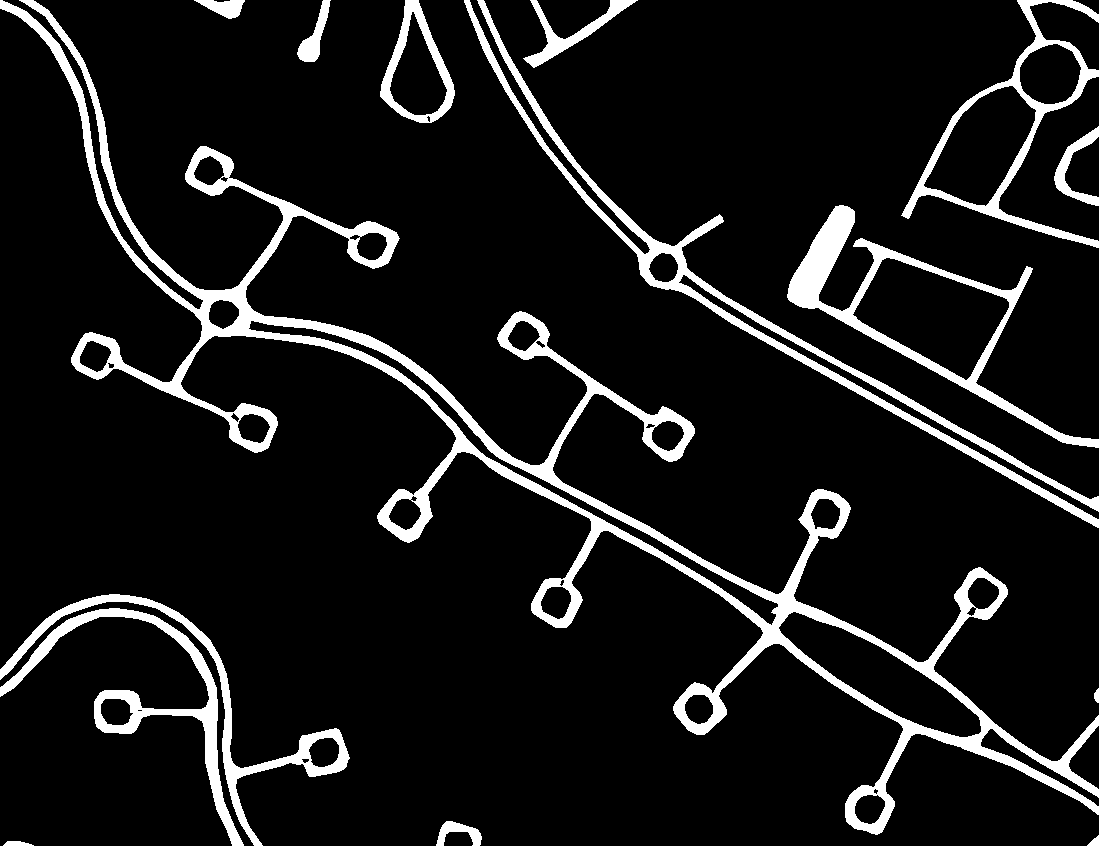

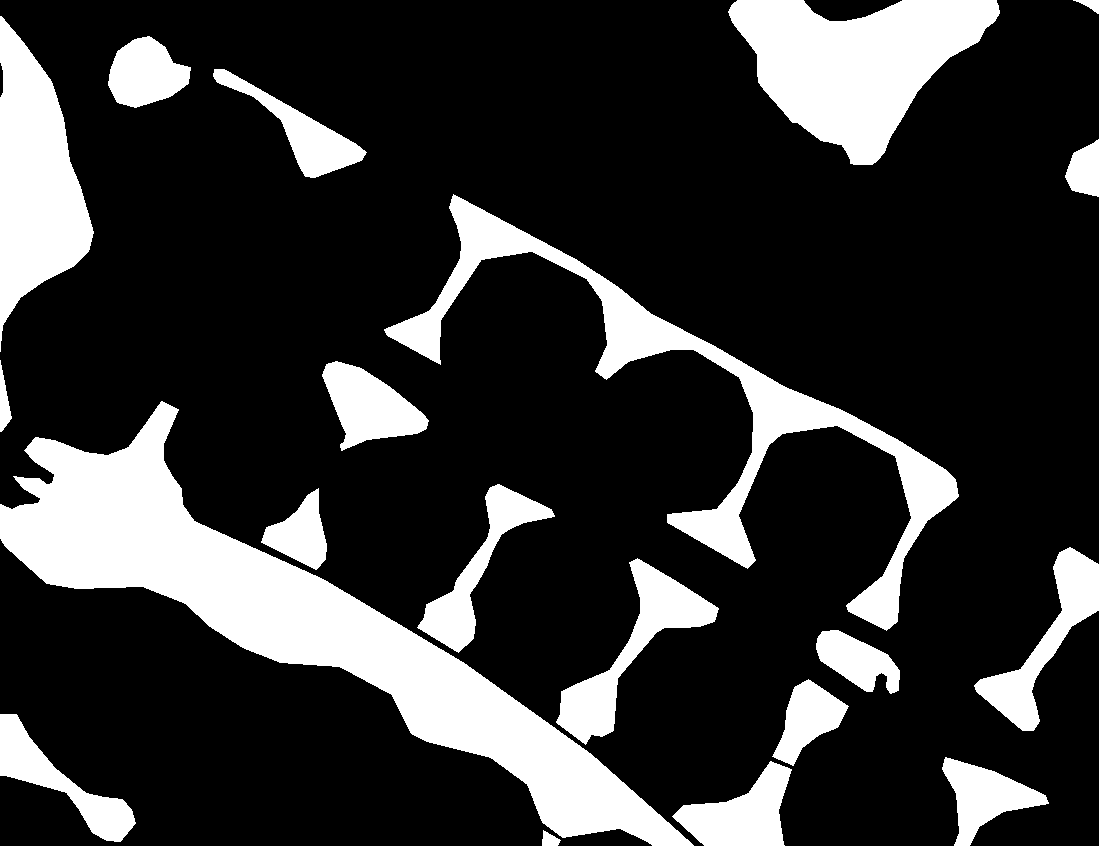

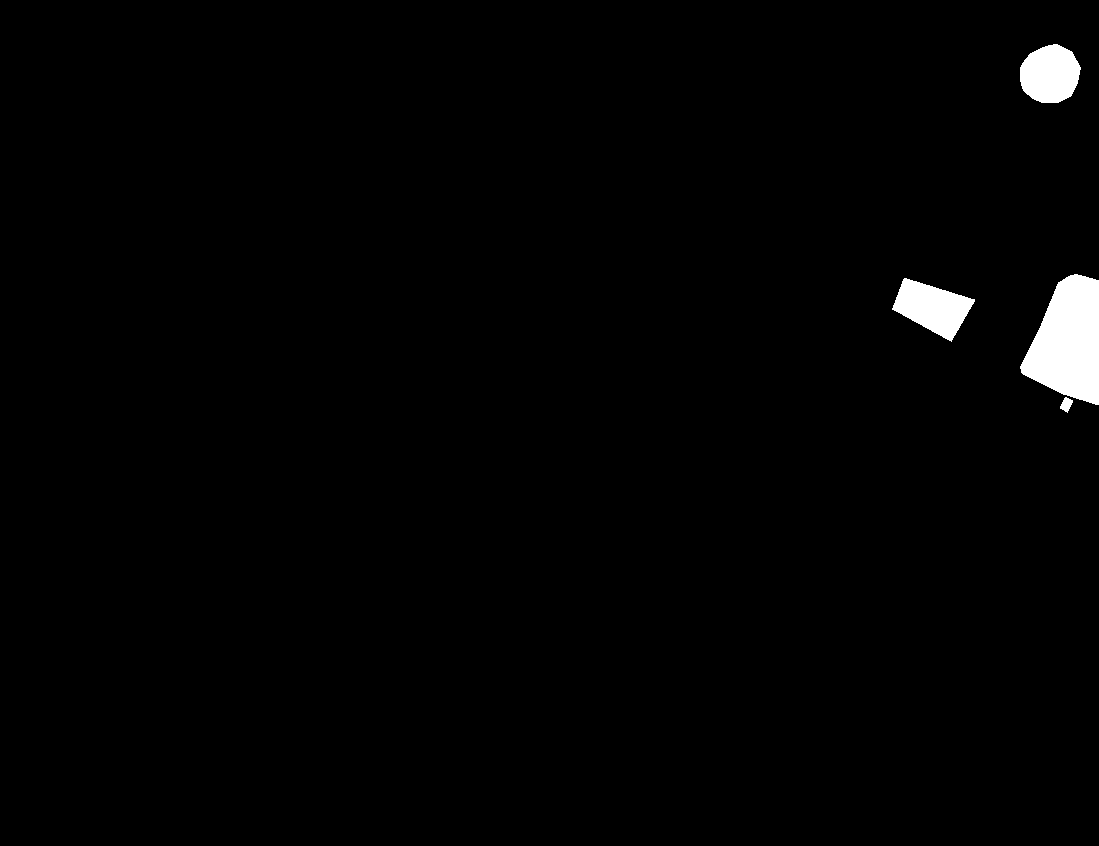

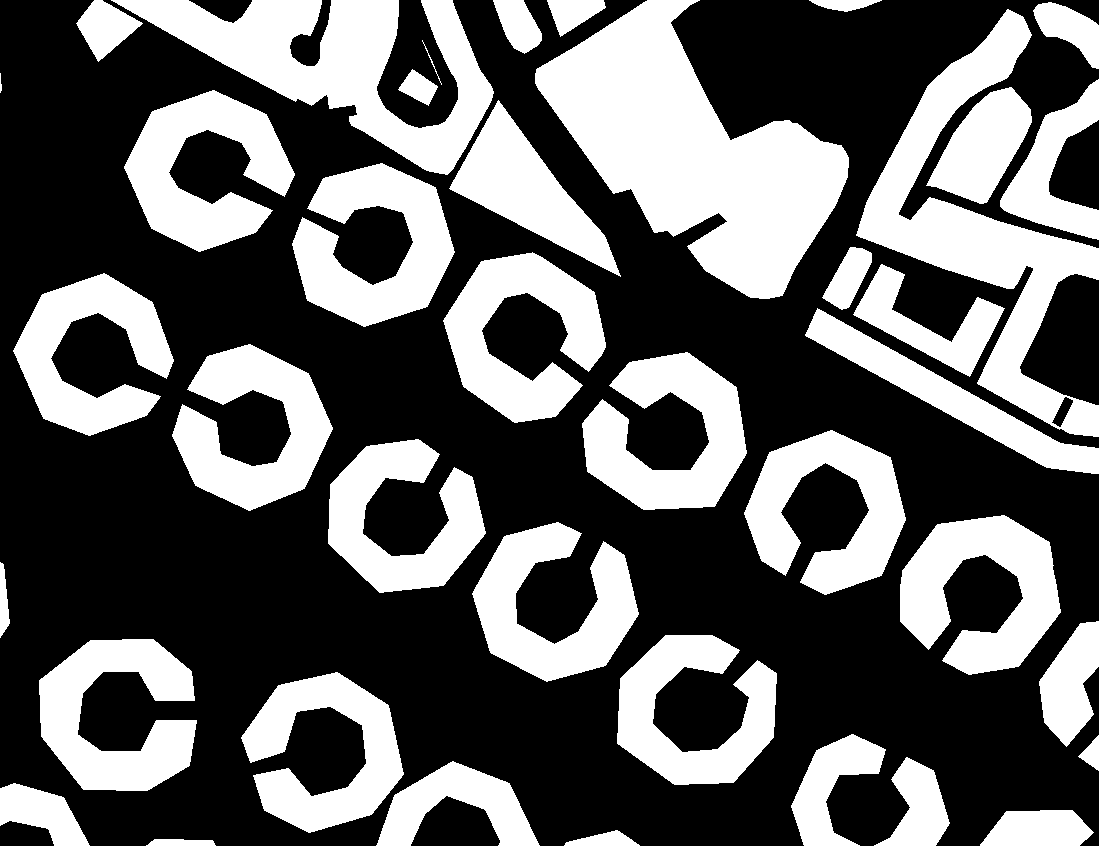

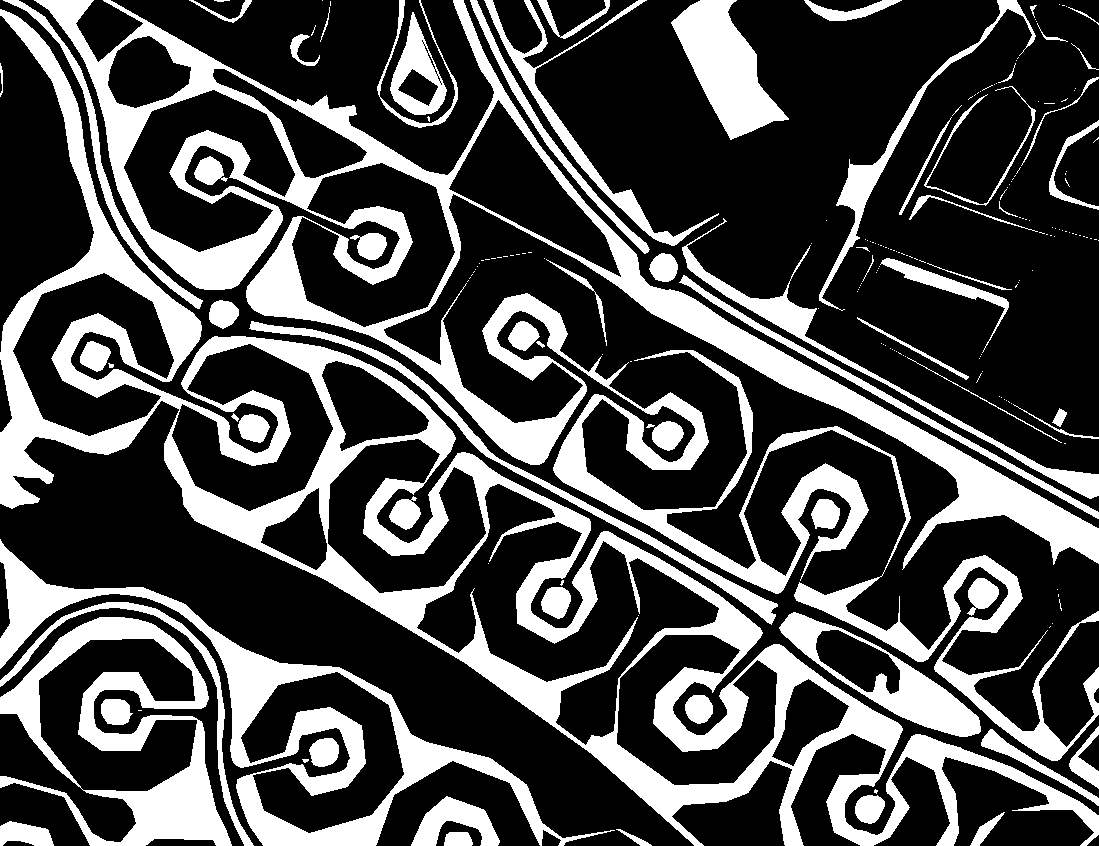

In [ ]:
road_binary_mask=create_binary_mask(masked_img, road_mask_color)
water_binary_mask=create_binary_mask(masked_img, water_mask_color)
tree_binary_mask=create_binary_mask(masked_img, tree_mask_color)
building_binary_mask=create_binary_mask(masked_img, building_mask_color)
land_binary_mask=create_binary_mask(masked_img, land_mask_color)

**Drawing contours from All binary masked image**

*   We will make function for this segment to reduce code length





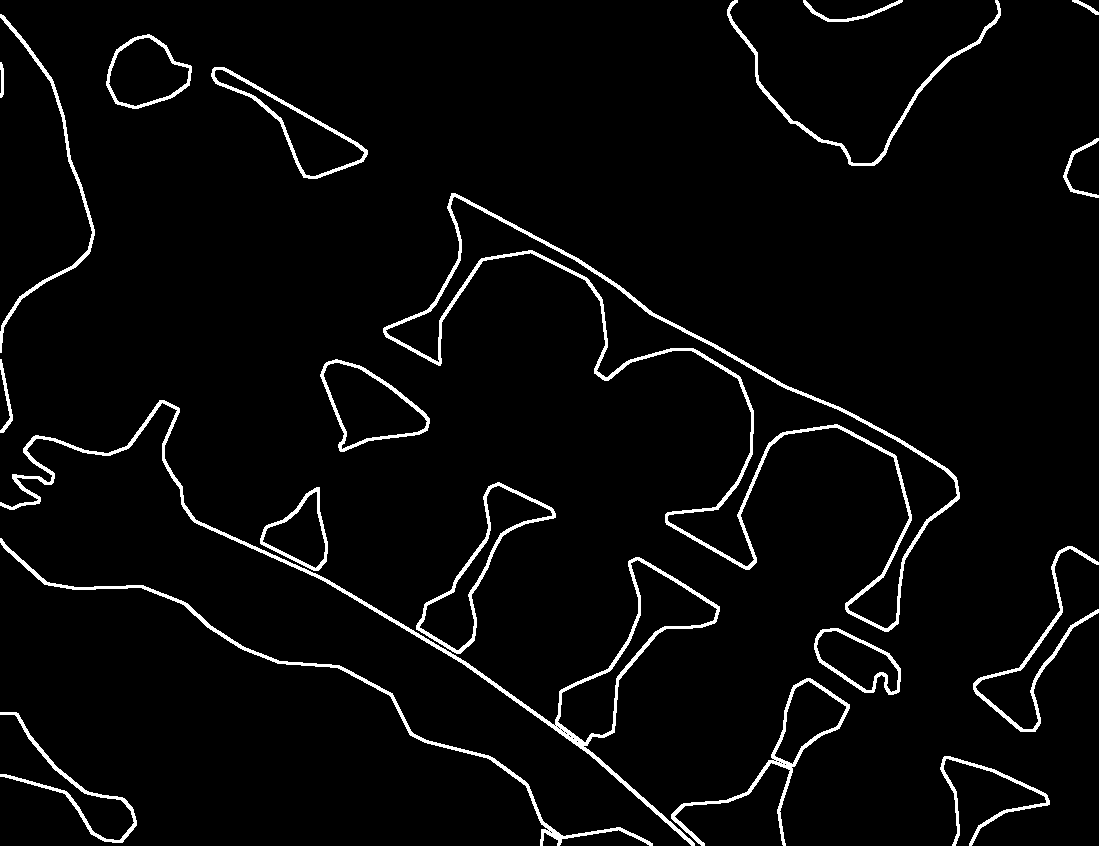

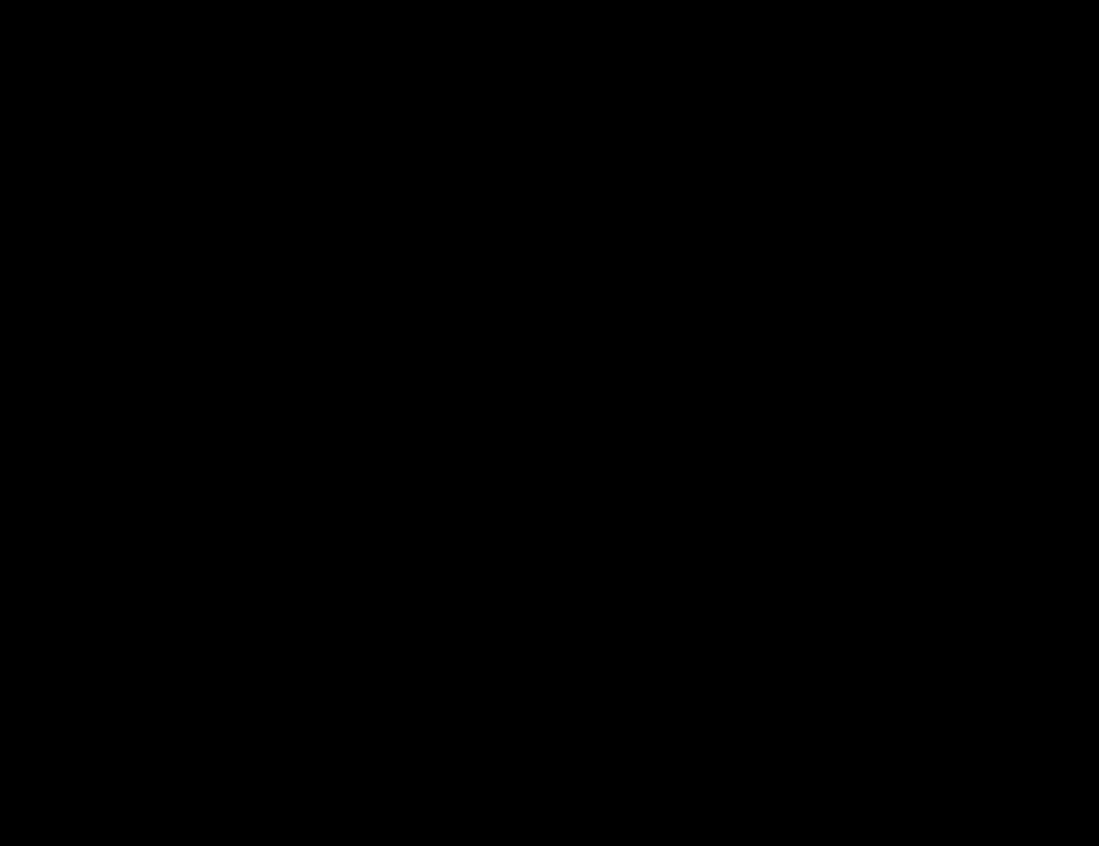

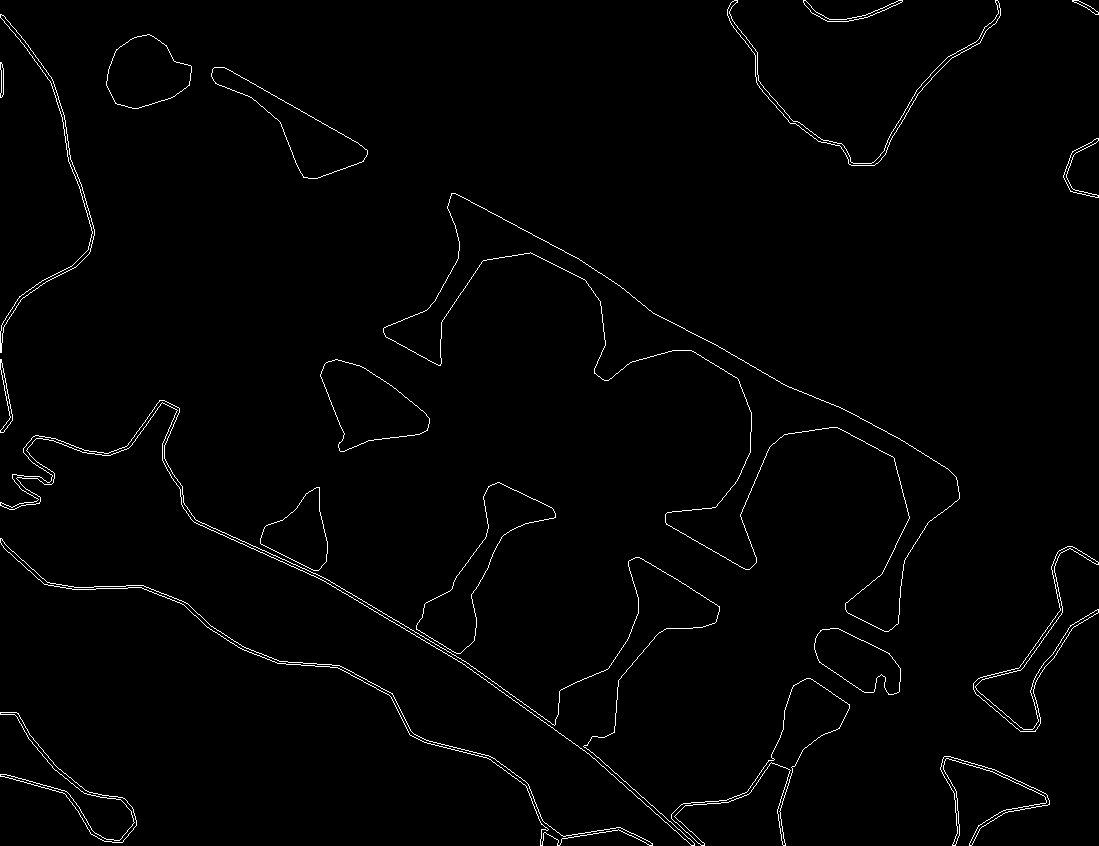

array([[  0,   0, 255, ...,   0,   0,   0],
       [  0,   0, 255, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0, 255, ...,   0,   0,   0],
       [  0,   0, 255, ...,   0,   0,   0],
       [  0,   0, 255, ...,   0,   0,   0]], dtype=uint8)

In [ ]:
water_edges = cv2.Canny(water_binary_mask, 100, 100)
water_dilated_edges = cv2.dilate(water_edges, None, iterations=1)
water_contours, _ = cv2.findContours(water_dilated_edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2_imshow(water_dilated_edges)
water_contoured_mask = np.zeros_like(water_binary_mask)
cv2_imshow(water_contoured_mask)
cv2.drawContours(water_contoured_mask, water_contours, -1, (255, 193, 0), 1)
cv2_imshow(water_contoured_mask)

road_edges = cv2.Canny(road_binary_mask, 100, 100)
road_dilated_edges = cv2.dilate(road_edges, None, iterations=1)
road_contours, _ = cv2.findContours(road_dilated_edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
road_contoured_mask = np.zeros_like(road_binary_mask)
cv2.drawContours(road_contoured_mask, road_contours, -1, (255, 193, 0), 1)

building_edges = cv2.Canny(building_binary_mask, 100, 100)
building_dilated_edges = cv2.dilate(building_edges, None, iterations=1)
building_contours, _ = cv2.findContours(building_dilated_edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
building_contoured_mask = np.zeros_like(building_binary_mask)
cv2.drawContours(building_contoured_mask, building_contours, -1, (255, 193, 0), 1)


tree_edges = cv2.Canny(tree_binary_mask, 100, 100)
tree_dilated_edges = cv2.dilate(tree_edges, None, iterations=1)
tree_contours, _ = cv2.findContours(tree_dilated_edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
tree_contoured_mask = np.zeros_like(tree_binary_mask)
cv2.drawContours(tree_contoured_mask,tree_contours, -1, (255, 193, 0), 1)


land_edges = cv2.Canny(land_binary_mask, 100, 100)
land_dilated_edges = cv2.dilate(land_edges, None, iterations=1)
land_contours, _ = cv2.findContours(land_dilated_edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
land_contoured_mask = np.zeros_like(land_binary_mask)
cv2.drawContours(land_contoured_mask, land_contours, -1, (255, 193, 0), 1)

**Draw contours on Original Image and Count number of regions**

In [ ]:
n_regions=[0,0,0,0,0]
for contour in water_contours:
  water_contoured_img=cv2.drawContours(img, [contour], -1, blue, 2)
  n_regions[0]=n_regions[0]+1
cv2_imshow(water_contoured_img)
for contour in tree_contours:
  tree_contoured_img=cv2.drawContours(img, [contour], -1, green, 2)
  n_regions[1]=n_regions[1]+1
for contour in building_contours:
  building_contoured_img=cv2.drawContours(img, [contour], -1, red, 2)
  n_regions[2]=n_regions[2]+1
for contour in road_contours:
  road_contoured_img=cv2.drawContours(img, [contour], -1, road_mask_color, 2)
  n_regions[3]=n_regions[3]+1
for contour in land_contours:
  land_contoured_img=cv2.drawContours(img, [contour], -1, land_mask_color, 1)
  n_regions[4]=n_regions[4]+1
print(n_regions)
cv2_imshow(water_contoured_img)

# Finding the **Area and Percentage** from all binary mask image class

Area calculating function

In [ ]:
def Regions_Area_Percentage(x_binary_masked_img,original_img,class_name):
  total_area=1000*1000 #Here let's assume total actual area is 1000000 KM^2
  total_pixels=original_img.shape[0]*original_img.shape[1]
  x_pixels = cv2.countNonZero(x_binary_masked_img)
  return((total_area/total_pixels)*x_pixels,(x_pixels/total_pixels)*100,class_name)

Calculating all classes area and the percentage

In [ ]:
area_percentage=[]
area_percentage.append(Regions_Area_Percentage(water_binary_mask,img,'Water'))
area_percentage.append(Regions_Area_Percentage(tree_binary_mask,img,'Tree'))
area_percentage.append(Regions_Area_Percentage(building_binary_mask,img,'Building'))
area_percentage.append(Regions_Area_Percentage(road_binary_mask,img,'Road'))
area_percentage.append(Regions_Area_Percentage(land_binary_mask,img,'Land'))
print(area_percentage)


[(209208.0270695259, 20.920802706952593, 'Water'), (13893.997767151312, 1.3893997767151312, 'Tree'), (381015.8385981668, 38.101583859816685, 'Building'), (99181.0737033667, 9.918107370336669, 'Road'), (296701.06286178925, 29.670106286178928, 'Land')]


# **Generate report from current picture**

[0, 1, 2, 3, 4]


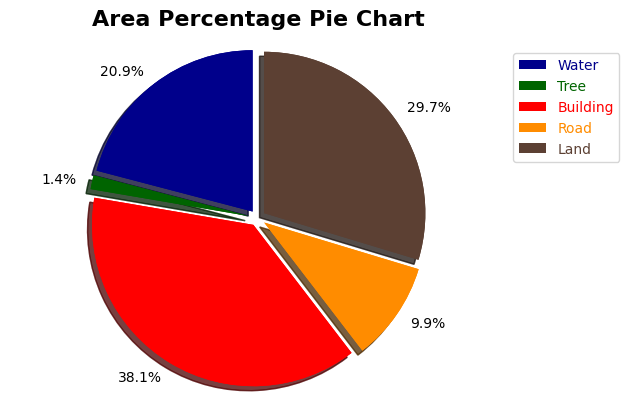

Report Year: 2023
╒═══════════════════════════╤═════════════╤════════════╤═════════════╤═════════════╤═════════════╕
│ Type of Information       │       Water │       Tree │    Building │        Road │        Land │
╞═══════════════════════════╪═════════════╪════════════╪═════════════╪═════════════╪═════════════╡
│ Number of regions         │     20      │     3      │     43      │    38       │     69      │
├───────────────────────────┼─────────────┼────────────┼─────────────┼─────────────┼─────────────┤
│ Area of regions (KM^2)    │ 209208      │ 13894      │ 381016      │ 99181.1     │ 296701      │
├───────────────────────────┼─────────────┼────────────┼─────────────┼─────────────┼─────────────┤
│ Percentage of regions (%) │     20.9208 │     1.3894 │     38.1016 │     9.91811 │     29.6701 │
╘═══════════════════════════╧═════════════╧════════════╧═════════════╧═════════════╧═════════════╛


In [ ]:
import matplotlib.pyplot as plt
from tabulate import tabulate

# Sample data

# Filtering out zero elements
non_zero_indices = [index for index, (_, percentage, _) in enumerate(area_percentage) if percentage != 0]
areas = [format(item[0], '.2f') for item in area_percentage]
percentages = [item[1] for item in area_percentage]
regions = [item[2] for item in area_percentage]

# Custom colors for pie slices
colors = ['#00008B', '#006400', '#ff0000', '#FF8C00', '#5C4033']

# Generating the pie chart
fig, ax = plt.subplots()

# Explode values for offsetting slices
explode = [0.05 if index in non_zero_indices else 0 for index in range(len(area_percentage))]

pie = ax.pie(
    percentages,
    labels=None,  # Remove labels from the pie chart
    autopct=None,  # Remove default percentage labels
    colors=[colors[i] for i in range(len(area_percentage))],
    startangle=90,
    explode=explode,
    shadow=True,  # Add shadow effect to the pie chart
    textprops={'color': 'white'}
)

# Adding percentages outside the pie chart with black font color for non-zero elements
non_zero_percentages = [p for p in percentages if p != 0]
non_zero_labels = [f'{p:.1f}%' for p in non_zero_percentages]
print(non_zero_indices)
if non_zero_labels:
    ax.pie(
        non_zero_percentages,
        labels=non_zero_labels,
        labeldistance=1.1,  # Move labels outside the pie
        colors=[colors[i] for i in non_zero_indices],
        startangle=90,
        explode=[0.05] * len(non_zero_indices),
        shadow=True,  # Add shadow effect to the pie chart
        textprops={'color': 'black'}
    )

# Set aspect ratio to be equal so that the pie is drawn as a circle
ax.axis('equal')

# Adding a legend with custom colors
legend_labels = [r for r in regions]
ax.legend(pie[0], legend_labels, loc="center left", bbox_to_anchor=(1, 0.8))

# Assigning custom colors to legend labels
for i, text in enumerate(ax.legend_.get_texts()):
    text.set_color(colors[i])

# Adding a title and customizing font
plt.title("Area Percentage Pie Chart", fontweight='bold', fontsize=16)

# Displaying the chart
plt.show()

# Creating the table
table = [['Type of Information', 'Water', 'Tree', 'Building', 'Road', 'Land']]
table.append(["Number of regions"] + n_regions)
table.append(["Area of regions (KM^2)"] + areas)
table.append(["Percentage of regions (%)"] + percentages)

# Printing the table
print("Report Year: 2023")
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))


# **The GUI for Reading images and applying some settings**


In [ ]:
from PIL import Image
import io
import ipywidgets as widgets
from IPython.display import display

# Function to handle file selection event
def on_file_upload(change):
    uploaded_files = change['new']
    for file_name, file_info in uploaded_files.items():
        img_content = file_info['content']
        try:
            img = Image.open(io.BytesIO(img_content))
            display(img)
        except:
            print(f"Error: Invalid image file {file_name}")

# Function to handle checkbox selection event
def on_checkbox_change(change):
    selected_checkbox = change['owner']
    if selected_checkbox.value:
        print(f"Selected Option: {selected_checkbox.description}")
    else:
        print(f"Deselected Option: {selected_checkbox.description}")

# Function to handle 'Generate Current Report Only' button click
def generate_current_report(button):
    print("Generating current report...")

# Function to handle 'Generate report & Compare with previous records' button click
def generate_report_compare(button):
    print("Generating report and comparing with previous records...")

# Function to handle 'Generate Suggestion' button click
def generate_suggestion(button):
    print("Generating suggestion...")

# Function to handle model selection event
def on_model_select(change):
    selected_model = change['new']
    if selected_model == 'War Attack Analyzer':
        year_select_container.layout.display = 'none'
        buttons_container.layout.display = 'none'
        suggestion_container.layout.display = 'flex'
        role_dropdown.layout.display = 'flex'
        suggestion_button.layout.display = 'flex'
    else:
        year_select_container.layout.display = 'flex'
        buttons_container.layout.display = 'flex'
        suggestion_container.layout.display = 'none'
        role_dropdown.layout.display = 'none'
        suggestion_button.layout.display = 'none'

# Create a file upload widget for the original image
file_upload = widgets.FileUpload(
    accept='image/*',
    multiple=False,
    description='Upload Original Image',
    button_style='primary',
    style={'description_width': 'initial'}
)

# Create a file upload widget for the mask image
mask_upload = widgets.FileUpload(
    accept='image/*',
    multiple=False,
    description='Upload Mask Image',
    button_style='primary',
    style={'description_width': 'initial'}
)

# Create a year selection dropdown widget
years = range(2000, 2025)
year_select = widgets.Dropdown(
    options=years,
    description='Select Year:',
    style={'description_width': 'initial'}
)

# Create checkbox widgets
tree_checkbox = widgets.Checkbox(description='Tree Detection')
water_checkbox = widgets.Checkbox(description='Water Detection')
building_checkbox = widgets.Checkbox(description='Building Detection')
road_checkbox = widgets.Checkbox(description='Road Detection')
freeland_checkbox = widgets.Checkbox(description='Free Land Detection')

# Create buttons
generate_current_button = widgets.Button(description='Generate Report', button_style='success')
generate_compare_button = widgets.Button(description='Compare Records', button_style='success')
suggestion_button = widgets.Button(description='Generate Suggestion', button_style='success')
suggestion_button.layout.display = 'none'

# Create ModelSelector dropdown
model_selector = widgets.Dropdown(
    options=['Environment Analyzer', 'War Attack Analyzer'],
    description='Select Model:',
    style={'description_width': 'initial'}
)

# Create Role dropdown
role_dropdown = widgets.Dropdown(
    options=['Attacker', 'Defender'],
    description='Your Role:',
    style={'description_width': 'initial'}
)
role_dropdown.layout.display = 'none'

# Register the event handlers
file_upload.observe(on_file_upload, names='value')
mask_upload.observe(on_file_upload, names='value')
tree_checkbox.observe(on_checkbox_change, names='value')
water_checkbox.observe(on_checkbox_change, names='value')
building_checkbox.observe(on_checkbox_change, names='value')
road_checkbox.observe(on_checkbox_change, names='value')
freeland_checkbox.observe(on_checkbox_change, names='value')
generate_current_button.on_click(generate_current_report)
generate_compare_button.on_click(generate_report_compare)
suggestion_button.on_click(generate_suggestion)
model_selector.observe(on_model_select, names='value')

# Set the widget layout and style
file_upload.layout.width = '500px'
file_upload.layout.margin = '20px 0'
mask_upload.layout.width = '500px'
mask_upload.layout.margin = '20px 0'
year_select.layout.width = '200px'
generate_current_button.layout.margin = '10px'
generate_compare_button.layout.margin = '10px 0'
suggestion_button.layout.margin = '10px 0'
model_selector.layout.width = '300px'

# Apply custom styles to the widgets
file_upload_button_style = {'button_color': '#4CAF50'}
file_upload.style.button_color = file_upload_button_style['button_color']
mask_upload.style.button_color = file_upload_button_style['button_color']
generate_current_button.style.button_color = file_upload_button_style['button_color']
generate_compare_button.style.button_color = '#1976D2'  # Blue color for the second button
suggestion_button.style.button_color = '#1976D2'  # Blue color for the suggestion button
checkbox_style = {'description_width': 'initial'}
container_style = {'border': '2px solid #DDD', 'padding': '20px'}

# Create a container to hold the checkboxes
checkboxes_container = widgets.VBox([
    tree_checkbox,
    water_checkbox,
    building_checkbox,
    road_checkbox,
    freeland_checkbox
])

# Create a container to hold the year selection
year_select_container = widgets.VBox([
    year_select
])

# Create a container to hold the buttons
buttons_container = widgets.HBox([
    generate_current_button,
    generate_compare_button
])

# Create a container to hold the suggestion button
suggestion_container = widgets.VBox([
    suggestion_button
])

# Create a container to hold the year selection and model selector
selection_container = widgets.HBox([
    year_select_container,
    model_selector
])

# Create a container to hold the role dropdown and suggestion button
role_suggestion_container = widgets.HBox([
    role_dropdown,
    suggestion_button
])

# Create a container to hold all the widgets
container = widgets.VBox([
    file_upload,
    mask_upload,
    selection_container,
    checkboxes_container,
    buttons_container,
    role_suggestion_container
])

# Apply custom styles to the container
container.layout = widgets.Layout(**container_style)

# Display the container
display(container)
